<a href="https://colab.research.google.com/github/Devarsh-Patel/CECS-456-Machine-Learning-Project/blob/main/animals_yazmin_yanez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CECS 456 - Group Project

Machine Learning 

Yazmin Yanez 

016749913


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd 
import os

In [ ]:
#Provided by dataset as original labels are in italian 
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", 
             "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", 
             "scoiattolo": "squirrel", "dog": "cane", "cavallo": "horse", 
             "elephant" : "elefante", "butterfly": "farfalla", "chicken": "gallina", 
             "cat": "gatto", "cow": "mucca", "spider": "ragno", "squirrel": "scoiattolo"} 

animalNamesIt = ["cane", "cavallo", "elefante", "farfalla", "gallina", "gatto", "mucca", "pecora", "ragno", "scoiattolo"]
animalNamesEn = ["dog", "horse", "elephant", "butterfly", "chicken", "cat", "cow", "sheep", "spider", "squirrel"]

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download alessiocorrado99/animals10

 97% 570M/586M [00:20<00:00, 32.6MB/s]
100% 586M/586M [00:20<00:00, 30.4MB/s]


In [ ]:
! unzip animals10.zip 

In [ ]:
#Dataset contains 26,179 images from 10 categories 
#Split into 5:4:1 training:validation:testing 14000:11200:2800 

#Goal: Split data into training (includes: training & validation) and testing sets 

#

img_height = 224
img_width = 224
batch_size = 32
#set aside 10% of data for testing before splitting 

train_ds = tf.keras.utils.image_dataset_from_directory(
  'raw-img',
  validation_split=0.1,
  subset="training",
  seed=420,
  image_size=(img_height, img_width),
  batch_size=batch_size
  )

val_ds = tf.keras.utils.image_dataset_from_directory(
  'raw-img',
  validation_split=0.1,
  subset="validation",
  seed=420,
  image_size=(img_height, img_width),
  batch_size=batch_size
  )

class_names = train_ds.class_names
#print(class_names)

#


Found 26179 files belonging to 10 classes.
Using 23562 files for training.
Found 26179 files belonging to 10 classes.
Using 2617 files for validation.


'\nimport numpy as np\nfrom sklearn.model_selection import train_test_split\n\nfull_dataset = tf.keras.utils.image_dataset_from_directory(\n    \'raw-img\', \n    #added v\n    #validation_split=0.1,\n    #subset="training",\n    seed=420,\n    labels=\'inferred\',\n    label_mode=\'categorical\',\n    #added ^\n    image_size=(224,224), \n    batch_size=32\n)\n\n###\nfull_dataset_valid = tf.keras.utils.image_dataset_from_directory(\n    \'raw-img\', \n    #added v\n    validation_split=0.1,\n    subset="validation",\n    seed=420,\n    labels=\'inferred\',\n    label_mode=\'categorical\',\n    #added ^\n    image_size=(224,224), \n    batch_size=32\n)\ntrain_label = np.concatenate([y for x, y in full_dataset_train])\ntest_label = np.concatenate([y for x, y in full_dataset_valid]) \n###\n\n\nfull_dataset_labels = np.array([])\n\nfor x, y in full_dataset:\n  #predictions = np.concatenate([predictions, model.predict_classes(x)])\n  full_dataset_labels = np.concatenate([full_dataset_label

In [ ]:
#Building Neural Network Model/Architecture

model = tf.keras.models.Sequential() #initializing the CNN model 

#VGG16 

model.add(tf.keras.layers.Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3), padding="same", activation="relu"))

model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3), padding="same", activation="relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=4096,activation="relu"))
#model.add(tf.keras.layers.Dropout(0.5)) #added, see if this does anything for anything 
model.add(tf.keras.layers.Dense(units=4096,activation="relu"))
#model.add(tf.keras.layers.Dropout(0.5)) #added, see if this does anything for anything 
model.add(tf.keras.layers.Dense(units=10, activation="softmax"))
#model.add(tf.keras.layers.Dense(10, activation="softmax"))

"""
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=7, activation="relu", padding = "same", input_shape=[224, 224, 3])) #Convolution 1 
#                             64 filters; 7x7;          relu preferred; dont need to count padding; 
#                                                                       dont lose any info 
#                                                                       preserve spacial info 
#                                                                       keep size 
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Pooling 1
#                               output size: (size=28-poolsize=2)/(stride = 2) + 1 = 14
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding = "same")) #Convolution 2
#                             128 filters 
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding = "same")) #Convolution 3 
#                                                                            preserve spacial information
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Pooling 2
#                                 output size: (size=14-poolsize=2)/(stride=2)+1 = 7 
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding = "same")) #Convolution 4
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding = "same")) #Convolution 5 
#                                 output size: 7x7 since padding is the same for the last 2 layers, which keeps the size 
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Pooling 3 
#                                 output size: (lowerbound[(7-2)/(2)])+1 = 3 
cnn.add(tf.keras.layers.Flatten()) #Flattening 
cnn.add(tf.keras.layers.Dense(units=128, activation="relu"))#Full Connection1
tf.keras.layers.Dropout(0.5) 
#   dropout randomly removes some neurons 
cnn.add(tf.keras.layers.Dense(units=64, activation="relu"))#Full Connection2
tf.keras.layers.Dropout(0.5)
cnn.add(tf.keras.layers.Dense(units= 10, activation= "softmax"))#Output layer 
#   units = 10 because we have 10 classes 

#generally, we want fewer parameters, so smaller filters with deeper architecture (aka more convolution layers) 
#Tips: 
#Replace large convolutions (5 x 5, 7 x 7) with stacks of 3 x 3 convolutions
#1 x 1 “bottleneck” convolutions are very efficient
#All of the above give fewer parameters, less compute, more nonlinearity 
#Do not use sigmoid, saturated neurons "kill" the gradient
#Leaky ReLU was made to avoid saturation and so the gradient is not 0 when x<0 
#Use ReLU. Be careful with your learning rates (10^-3/10^-4)
# Try out Leaky ReLU
#Try out tanh and sigmoid but don’t expect much
"""

'\ncnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=7, activation="relu", padding = "same", input_shape=[224, 224, 3])) #Convolution 1 \n#                             64 filters; 7x7;          relu preferred; dont need to count padding; \n#                                                                       dont lose any info \n#                                                                       preserve spacial info \n#                                                                       keep size \ncnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Pooling 1\n#                               output size: (size=28-poolsize=2)/(stride = 2) + 1 = 14\ncnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding = "same")) #Convolution 2\n#                             128 filters \ncnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding = "same")) #Convolution 3 \n#                                                  

In [ ]:
#Print out Model Architecture 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [ ]:
#Compile Model
opt = tf.keras.optimizers.Adam(0.001)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt, 
              metrics=['accuracy']) 

In [ ]:
#Train the Network 

#history = cnn.fit(X_train, y_train, batch_size = 100, epochs=5, validation_data=(X_valid, y_valid)) 
#history = model.fit(
#                  large dataset of images to train on, 
#                           large dataset of int labels to train with, 
#                                    batch size = 32 
#                                                      epochs = 30
#                                                                validation_data=(last 5000 images split from full dataset exclusive for testing, 
#                                                                                          last 5000 digit labels from full dataset exclusive for testing)
#                   )
#X_train_full = images for training 
#y_train_full = digit labels for training data
#X_test = images for testing
#y_test = digit labels for testing data
#X_train = X_train_full-last 5000 images to be used for training 
#X_valid = last 5000 images of X_train_full to be used for validation
#y_train = y_train_full-last 5000 digit labels to be used for training 
#y_valid = last 5000 digit labels of y_train_full to be used for validation

history = model.fit(train_ds, validation_data = val_ds, batch_size = 32, epochs=30, steps_per_epoch = 10)

Epoch 1/30
10/10 [==============================] - 58s 4s/step - loss: 152.3063 - accuracy: 0.1594 - val_loss: 2.2415 - val_accuracy: 0.2063
Epoch 2/30
10/10 [==============================] - 33s 4s/step - loss: 2.3340 - accuracy: 0.1344 - val_loss: 2.2864 - val_accuracy: 0.1146
Epoch 3/30
10/10 [==============================] - 33s 4s/step - loss: 2.2595 - accuracy: 0.1906 - val_loss: 2.2511 - val_accuracy: 0.1941
Epoch 4/30
10/10 [==============================] - 33s 4s/step - loss: 2.2532 - accuracy: 0.2000 - val_loss: 2.2525 - val_accuracy: 0.2010
Epoch 5/30
10/10 [==============================] - 33s 4s/step - loss: 2.2593 - accuracy: 0.1844 - val_loss: 2.2558 - val_accuracy: 0.2010
Epoch 6/30
10/10 [==============================] - 33s 4s/step - loss: 2.2587 - accuracy: 0.1594 - val_loss: 2.2309 - val_accuracy: 0.2010
Epoch 7/30
10/10 [==============================] - 33s 4s/step - loss: 2.2313 - accuracy: 0.1531 - val_loss: 2.2069 - val_accuracy: 0.2010
Epoch 8/30
10/10 [

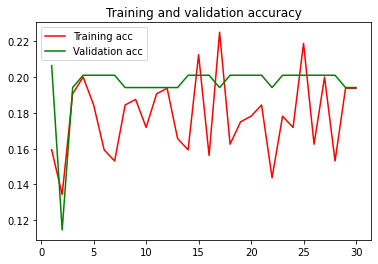

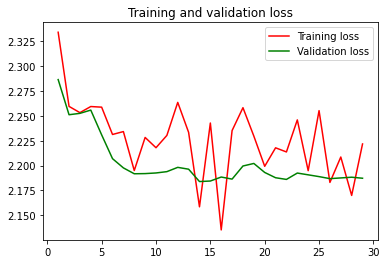

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(range(1,30), loss[1:], 'red', label='Training loss')#epochs, loss, 'red', label='Training loss')
plt.plot(range(1,30), val_loss[1:], 'green', label='Validation loss')#epochs, val_loss, 'green', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()